In [78]:
import sqlite3 as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
dw_df = pd.read_csv('dw_df.csv')

In [80]:
dw_df['creationDate'] = pd.to_datetime(dw_df['creationDate'])

In [81]:
studyID3_df = dw_df.loc[((dw_df.studyID_id==3) & (dw_df.factorID != 26))]
studyID3_df.dtypes

Unnamed: 0                    int64
questionID_id                 int64
response                      int64
questionID                    int64
questionTextID_id             int64
surveyID_id                   int64
questionTextID                int64
factorID_id                   int64
positive_p                    int64
factorID                      int64
factorName                   object
studyID_id                    int64
surveyID                      int64
userID_id                     int64
creationDate         datetime64[ns]
completionDate               object
userID                        int64
userGroup                    object
age                         float64
location                     object
hireDate                     object
dtype: object

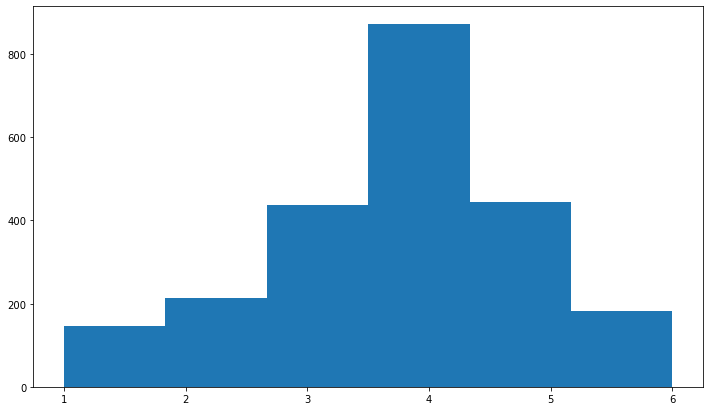

In [82]:
plt.hist(studyID3_df.response,bins=6)
# plt.xlabel('Facots')
# plt.ylabel('Response')

fig = plt.gcf()
fig.set_size_inches(12,7)

In [85]:
studyID3_df = studyID3_df.groupby(by=['factorID_id','creationDate'],as_index=False).mean()
#studyID3_df = studyID3_df.groupby(by=['creationDate'],as_index=False).mean()


/Users/minhaz/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Mean Response')

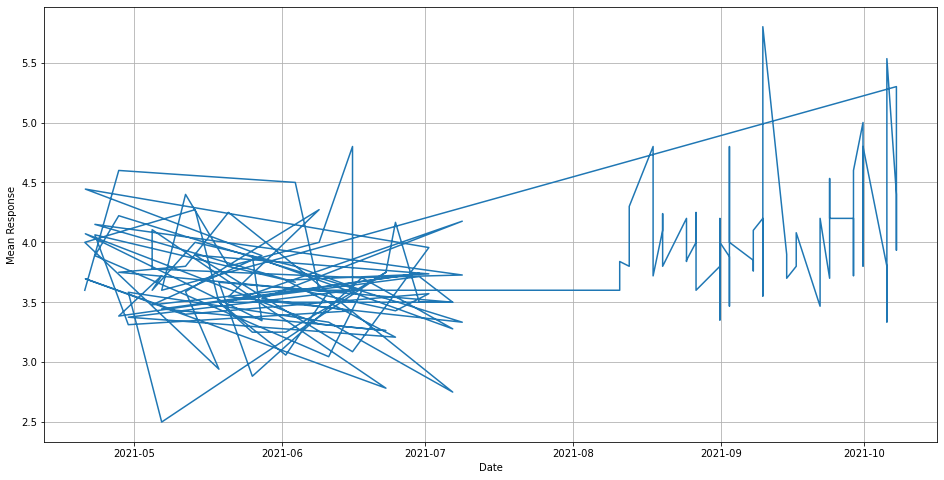

In [86]:
err = studyID3_df.loc[studyID3_df['factorID_id']==11].std().response
plt.errorbar(studyID3_df.creationDate,studyID3_df.response,yerr=err)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Mean Response')

In [84]:
date = studyID3_df[studyID3_df['factorID_id']==11,'creationDate']
res = studyID3_df[studyID3_df['factorID_id']==11,'response']
plt.errorbar(date,res)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Mean Response')

TypeError: '(0      False
1      False
2      False
3      False
4      False
       ...  
147    False
148    False
149    False
150    False
151    False
Name: factorID_id, Length: 152, dtype: bool, 'creationDate')' is an invalid key

In [ ]:
studyID3_df = studyID3_df.groupby(by=['factorID_id','creationDate'],as_index=False).mean()

In [ ]:
err = studyID3_df.std().response
studyID3_df.head()

In [ ]:
#plt.plot(studyID3_df.creationDate,studyID3_df.response)
plt.errorbar(studyID3_df.creationDate,studyID3_df.response,yerr=err)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Mean Response')